# Car Data visualization Project
## Introduction
### Dataset Description
- This dataset represents a collection of technical specifications and features of various vehicles, including information such as the manufacturer, model, year of production, and fuel type. It also includes technical details like the number of cylinders, engine displacement, and drive system. Additionally, the dataset provides indicators of fuel efficiency in both city and highway driving conditions, as well as CO2 emissions. This data is valuable for analyzing vehicle performance, comparing environmental efficiency, and understanding market trends in the automotive industry.



In [1]:
# import  the libraries that you will use
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
# show all columns
pd.set_option('display.max_columns', None)

## 1- Data Gathering

In [2]:
df = pd.read_csv('fuel-econ.csv')

In [3]:
df.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


## 2- Data Assessing


In [4]:
df.sample(5)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
2219,36474,Chevrolet,Impala,2016,Large Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,6,3.6,0,105,18.1904,22.7993,27.5622,39.1199,21.4765,410,5,5
1170,34438,BMW,ActiveHybrid 7L,2014,Large Cars,Rear-Wheel Drive,Automatic (S8),Premium Gasoline,6,3.0,0,115,22.4237,28.2068,30.4412,43.1262,25.4387,350,6,6
1318,34793,Chevrolet,Camaro,2014,Compact Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,8,7.0,93,0,13.0553,16.0000,19.2160,26.5000,15.2564,580,2,2
3104,38204,Lexus,GS 200t,2017,Midsize Cars,Rear-Wheel Drive,Automatic (S8),Premium Gasoline,4,2.0,0,99,22.1586,28.2688,32.0589,46.2295,25.7349,345,6,6
2294,36652,BMW,320i xDrive,2016,Compact Cars,All-Wheel Drive,Automatic (S8),Premium Gasoline,4,2.0,0,96,22.6844,29.0082,33.6841,48.8553,26.5921,335,6,6


In [5]:
df.shape

(3929, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         3929 non-null   int64  
 1   make       3929 non-null   object 
 2   model      3929 non-null   object 
 3   year       3929 non-null   int64  
 4   VClass     3929 non-null   object 
 5   drive      3929 non-null   object 
 6   trans      3929 non-null   object 
 7   fuelType   3929 non-null   object 
 8   cylinders  3929 non-null   int64  
 9   displ      3929 non-null   float64
 10  pv2        3929 non-null   int64  
 11  pv4        3929 non-null   int64  
 12  city       3929 non-null   float64
 13  UCity      3929 non-null   float64
 14  highway    3929 non-null   float64
 15  UHighway   3929 non-null   float64
 16  comb       3929 non-null   float64
 17  co2        3929 non-null   int64  
 18  feScore    3929 non-null   int64  
 19  ghgScore   3929 non-null   int64  
dtypes: float

In [7]:
# Empty values
df.isnull().sum()

id           0
make         0
model        0
year         0
VClass       0
drive        0
trans        0
fuelType     0
cylinders    0
displ        0
pv2          0
pv4          0
city         0
UCity        0
highway      0
UHighway     0
comb         0
co2          0
feScore      0
ghgScore     0
dtype: int64

In [8]:
# duplicated values
df.duplicated().sum()

0

In [9]:
df.describe()

,id,year,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
count,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000
mean,36006.724357,2015.500891,5.468313,2.950573,23.660982,59.239247,21.830462,28.044011,29.973842,42.850295,24.791339,376.564266,5.668872,5.659201
std,2189.349923,1.694775,1.878319,1.305901,37.724901,48.667549,6.246273,9.087195,5.747571,9.100423,6.003246,92.338892,1.755860,1.754589
min,32204.000000,2013.000000,2.000000,0.600000,0.000000,0.000000,10.540200,12.900000,16.559400,21.800000,12.821700,29.000000,1.000000,1.000000
25%,34087.000000,2014.000000,4.000000,2.000000,0.000000,0.000000,17.746900,22.200000,25.754200,36.000000,20.658100,315.000000,5.000000,5.000000
50%,36020.000000,2015.000000,5.000000,2.500000,0.000000,91.000000,20.823200,26.400000,29.633800,42.200000,24.000000,369.000000,5.000000,5.000000
75%,37935.000000,2017.000000,6.000000,3.600000,70.000000,100.000000,24.981400,32.264800,33.773100,48.900000,28.227100,429.000000,7.000000,7.000000
max,39901.000000,2018.000000,12.000000,7.000000,102.000000,127.000000,57.808800,83.559800,59.416900,79.100000,57.782400,692.000000,10.000000,10.000000


### 2-1- Tidiness issues

#### Each variable forms a column and contains values
- city, UCity, highway, Uhighway, comb, pv2, pu4 convertir les colonnes


#### Each observation forms a row
- nothing

#### Each type of observational unit forms a table
- nothing

#### A- Define :

- city, UCity, highway, Uhighway, comb =>  convertir les colonnes


#### B- Code :

In [10]:
# using fule
df = df.melt(
    id_vars=['id', 'make', 'model', 'year', 'VClass', 'drive', 'trans', 'fuelType', 'cylinders', 'displ', 'pv2', 'pv4', 'co2', 'feScore', 'ghgScore'],
    var_name='Fuel_usage',
    value_name='value'
)

#### C-Test :

In [11]:
df['Fuel_usage'].value_counts()

city        3929
UCity       3929
highway     3929
UHighway    3929
comb        3929
Name: Fuel_usage, dtype: int64

#### A- Define :
-  pv2, pu4 =>  convertir les colonnes


#### B- Code :

In [12]:
df = df.melt(
    id_vars=['id', 'make', 'model', 'year', 'VClass', 'drive', 'trans', 'fuelType', 'cylinders', 'displ', 'co2', 'feScore', 'ghgScore', 'Fuel_usage', 'value'],
    var_name='efficiency', # changes 
    value_name='pv_value'
)

#### C-Test :

In [13]:
df.sample(5)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,co2,feScore,ghgScore,Fuel_usage,value,efficiency,pv_value
29691,36443,Hyundai,Genesis Coupe,2016,Subcompact Cars,Rear-Wheel Drive,Automatic (S8),Premium Gasoline,6,3.8,455,4,4,highway,24.7612,pv4,0
11975,32618,Volvo,S80 AWD,2013,Midsize Cars,All-Wheel Drive,Automatic (S6),Regular Gasoline,6,3.0,425,5,5,UHighway,34.6000,pv2,0
26401,37745,Audi,S5 Cabriolet,2017,Subcompact Cars,All-Wheel Drive,Automatic (AM-S7),Premium Gasoline,6,3.0,428,4,4,UCity,22.1000,pv4,0
15775,32379,Porsche,911 Carrera S,2013,Minicompact Cars,Rear-Wheel Drive,Manual 7-spd,Premium Gasoline,6,3.8,411,5,5,comb,21.6983,pv2,70
24626,34197,BMW,750Li,2014,Large Cars,Rear-Wheel Drive,Automatic (S8),Premium Gasoline,8,4.4,465,4,4,UCity,20.2565,pv4,115


### 2-2- Quality issues

#### 1- Completeness :
- nothing

#### 2- Validity :
- nothing

#### 3- accuracy :
- nothing

#### 4- Consistency :
- nothing

## 5- Data Visualization


In [14]:
df.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,co2,feScore,ghgScore,Fuel_usage,value,efficiency,pv_value
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,471,4,4,city,16.4596,pv2,79
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,349,6,6,city,21.8706,pv2,94
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,429,5,5,city,17.4935,pv2,94
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,446,5,5,city,16.9415,pv2,94
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,310,8,8,city,24.7726,pv2,0


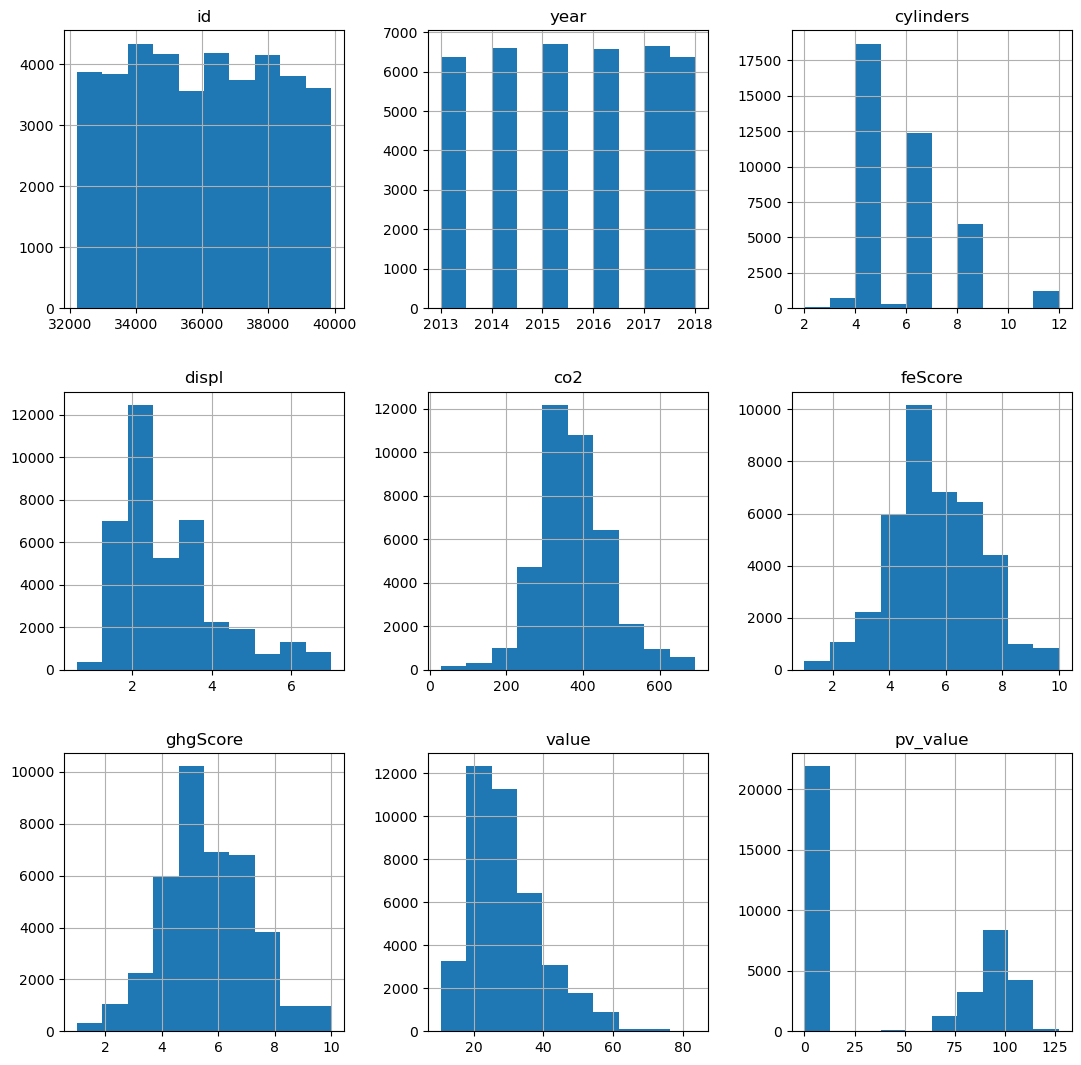

In [15]:
# Look at the data
df.hist(figsize=(13,13));

#### 1- Average CO2 Emissions by make

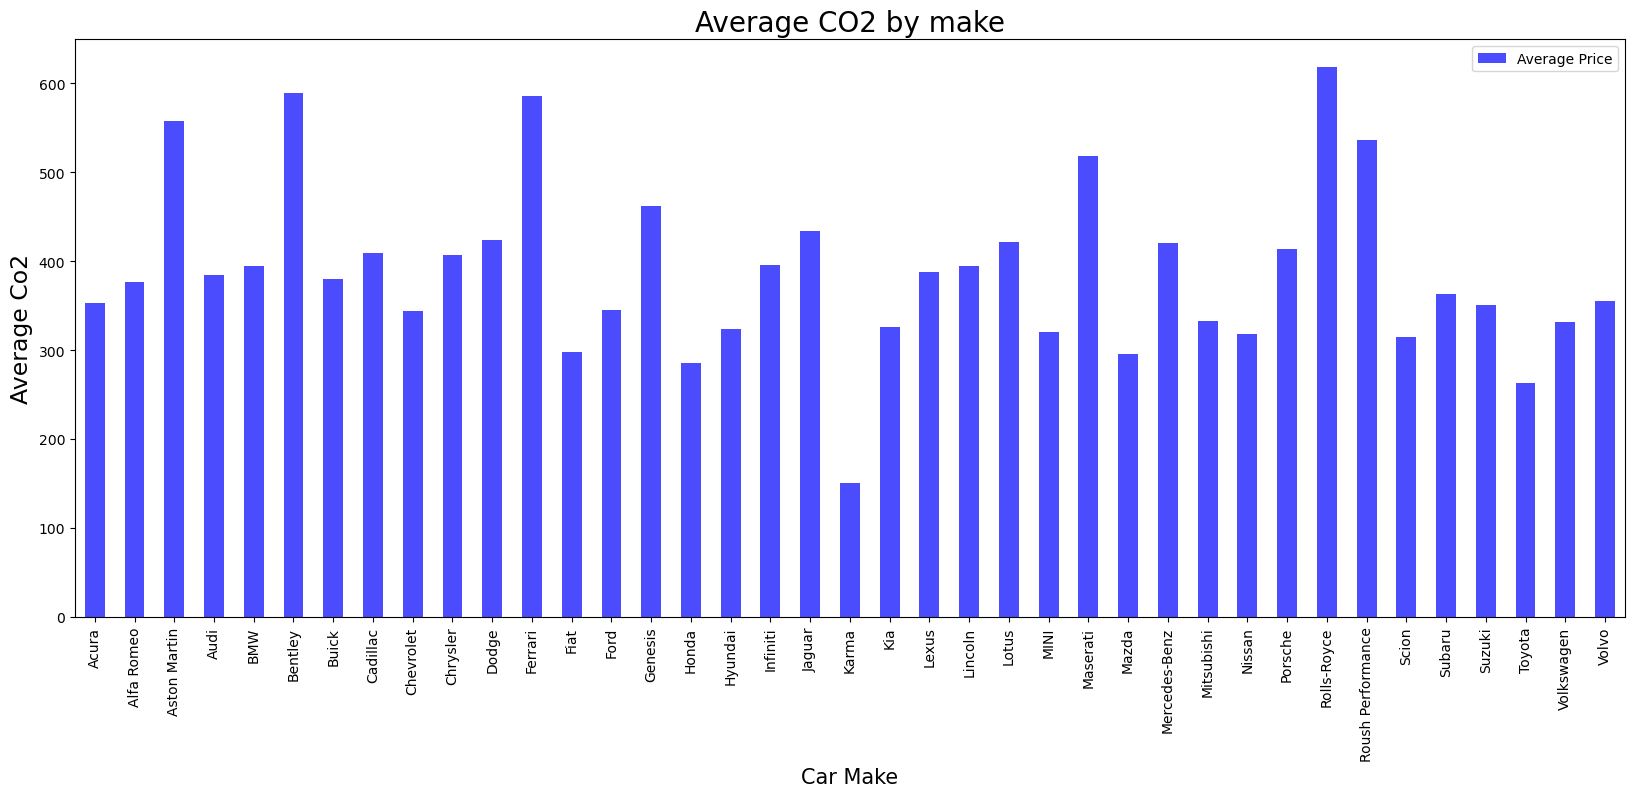

In [16]:
# Average CO2 Emissions by make
plt.figure(figsize=[20, 7.5])
df.groupby('make')['co2'].mean().plot(kind='bar', alpha=0.7, color='blue', label='Average Price')
plt.title('Average CO2 by make', size=20)
plt.xlabel('Car Make', size=15)
plt.ylabel('Average Co2', size=17)
plt.legend()
plt.show();

#### 2- make by  Average Fuel usage 

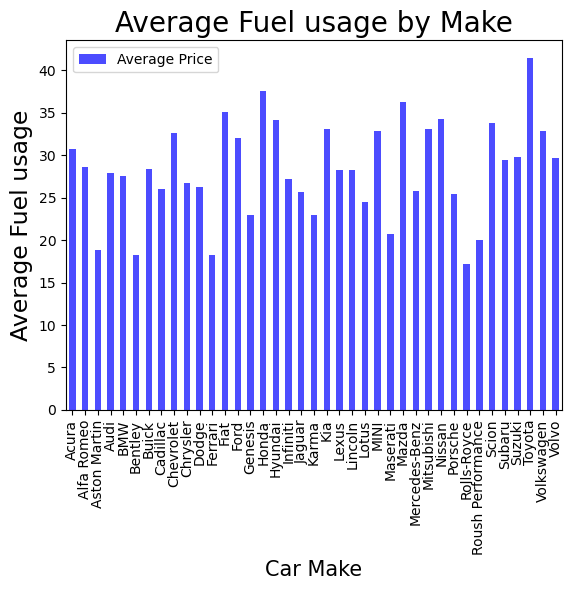

In [17]:
# Average Fuel usage by Make
df.groupby('make')['value'].mean().plot(kind='bar', alpha=0.7, color='blue', label='Average Price')
plt.title('Average Fuel usage by Make', size=20)
plt.xlabel('Car Make', size=15)
plt.ylabel('Average Fuel usage', size=17)
plt.legend()
plt.show();

#### 3- Years by Fuel usage

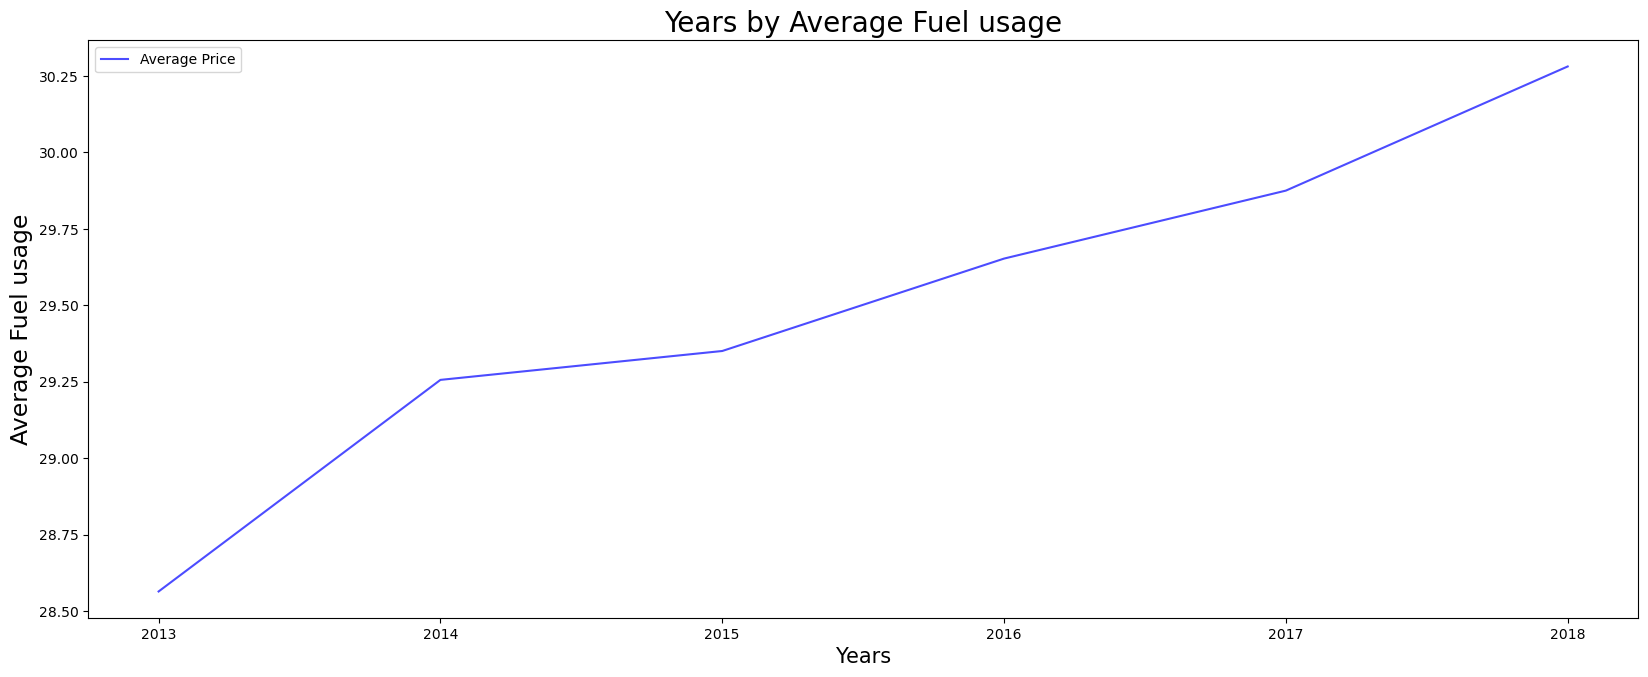

In [18]:
# Years by Fuel usage
plt.figure(figsize=[20, 7.5])
df.groupby('year')['value'].mean().plot(kind='line', alpha=0.7, color='blue', label='Average Price')
plt.title('Years by Average Fuel usage', size=20)
plt.xlabel('Years', size=15)
plt.ylabel('Average Fuel usage', size=17)
plt.legend()
plt.show();

#### 4- Years by co2

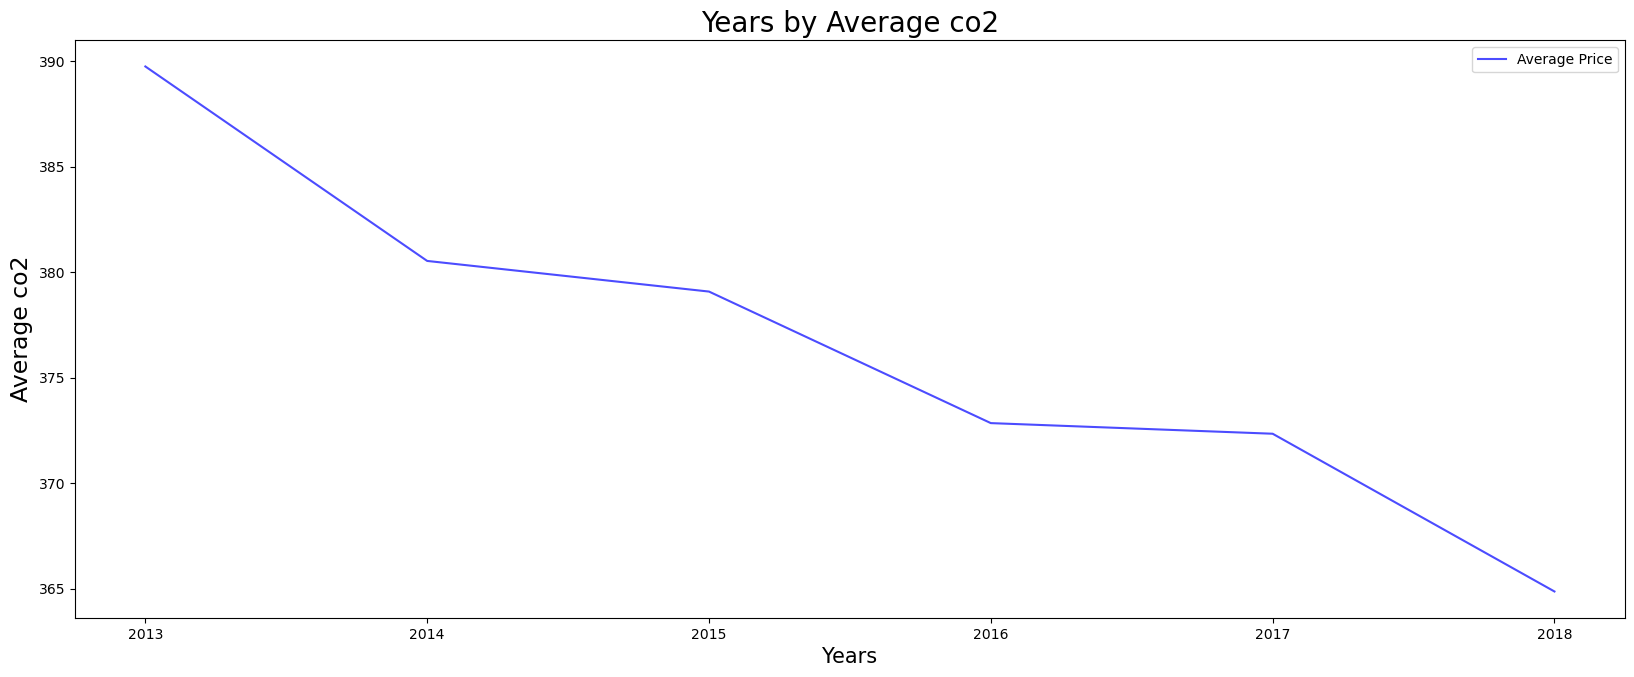

In [19]:
# Years by Fuel usage
plt.figure(figsize=[20, 7.5])
df.groupby('year')['co2'].mean().plot(kind='line', alpha=0.7, color='blue', label='Average Price')
plt.title('Years by Average co2', size=20)
plt.xlabel('Years', size=15)
plt.ylabel('Average co2', size=17)
plt.legend()
plt.show();

- Standardizing Automatic Transmission Labels in the 'trans' Column 

In [20]:
df['trans'] = df['trans'].apply(lambda x:
                  'Automatic'if 'Automatic' in x else x )

In [21]:
df['trans'] = df['trans'].apply(lambda x:
                  'Manual'if 'Manual' in x else x )

#### 5- Average Fuel usage by trans

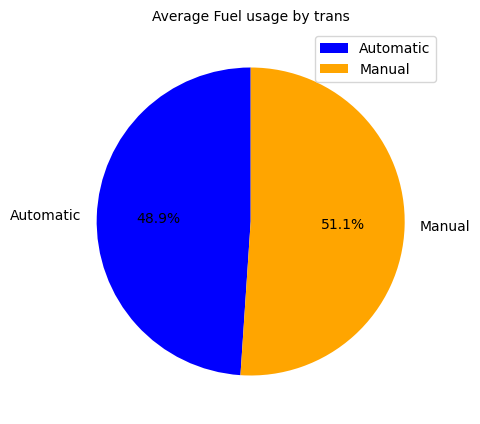

In [22]:
plt.figure(figsize=[5, 5])
df.groupby('trans')['value'].mean().plot(
            kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'], startangle=90
           )
plt.title('Average Fuel usage by trans', size=10)
plt.ylabel('')
plt.legend('')
plt.legend()
plt.show()

#### 6- Average Fuel usage value by drive

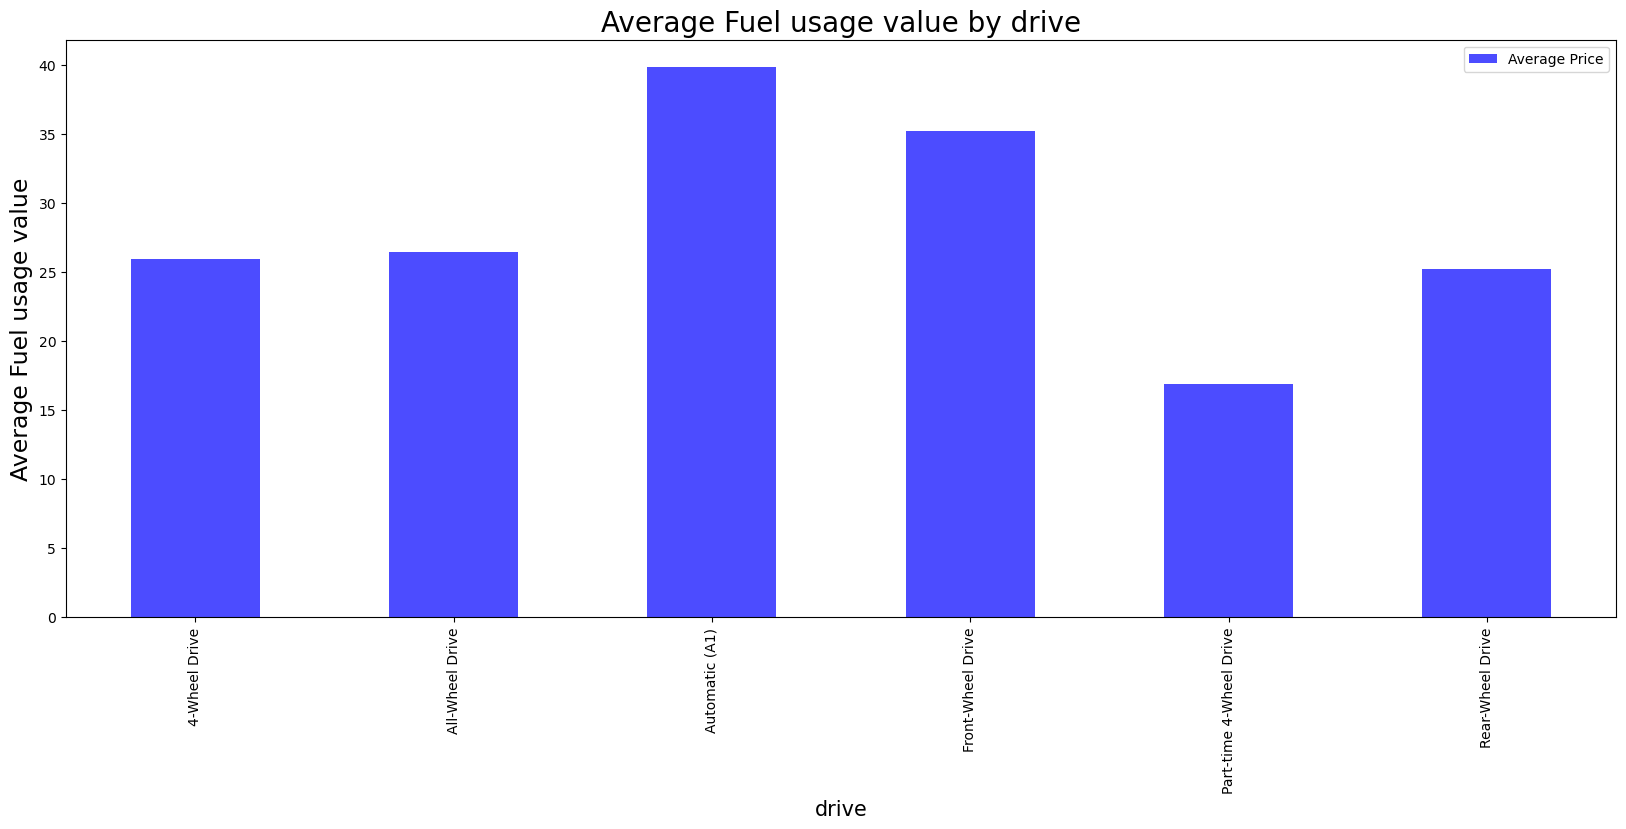

In [23]:
plt.figure(figsize=[20, 7.5])
df.groupby('drive')['value'].mean().plot(kind='bar', alpha=0.7, color='blue', label='Average Price')
plt.title('Average Fuel usage value by drive', size=20)
plt.xlabel('drive', size=15)
plt.ylabel('Average Fuel usage value', size=17)
plt.legend()
plt.show();

#### 7- Average Fuel usage value by VClass

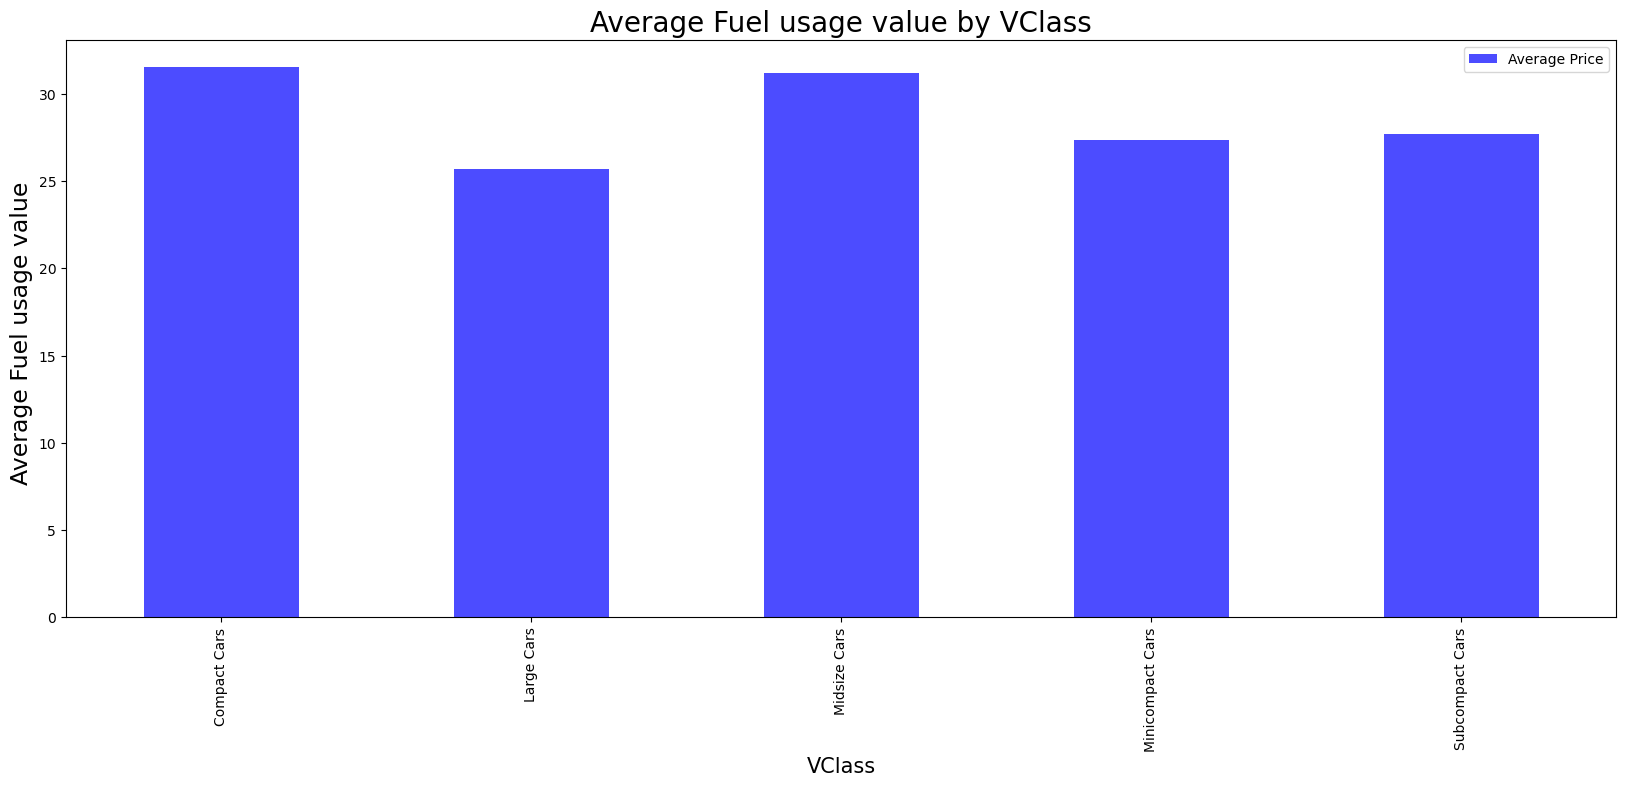

In [24]:
plt.figure(figsize=[20, 7.5])
df.groupby('VClass')['value'].mean().plot(kind='bar', alpha=0.7, color='blue', label='Average Price')
plt.title('Average Fuel usage value by VClass', size=20)
plt.xlabel('VClass', size=15)
plt.ylabel('Average Fuel usage value ', size=17)
plt.legend()
plt.show();

#### 8- Average co2 by VClass

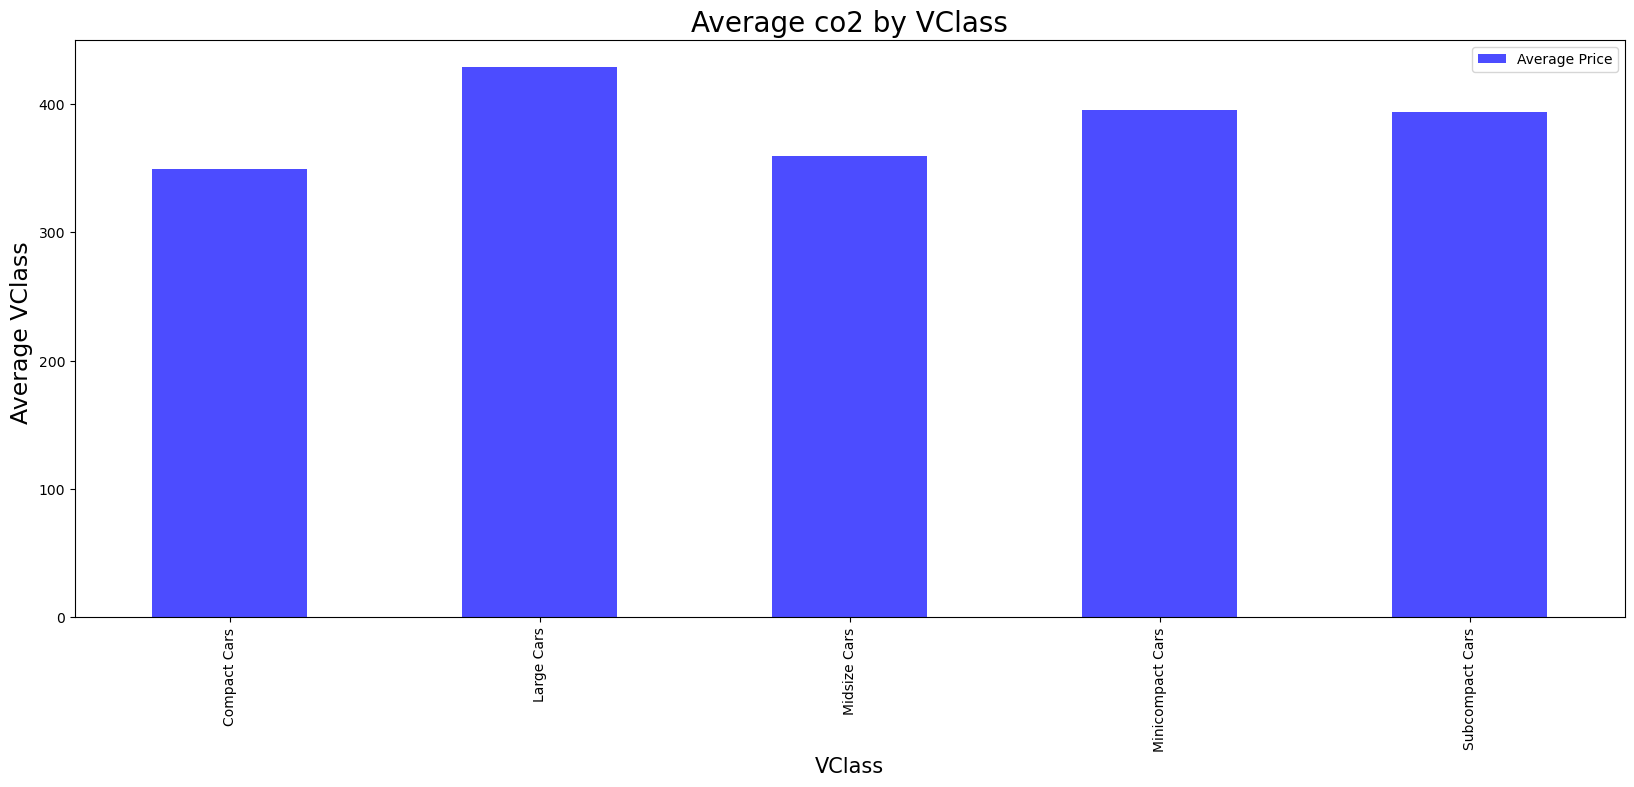

In [25]:
plt.figure(figsize=[20, 7.5])
df.groupby('VClass')['co2'].mean().plot(kind='bar', alpha=0.7, color='blue', label='Average Price')
plt.title('Average co2 by VClass', size=20)
plt.xlabel('VClass', size=15)
plt.ylabel('Average VClass ', size=17)
plt.legend()
plt.show();

#### 9- Understanding relationships between multiple variables.

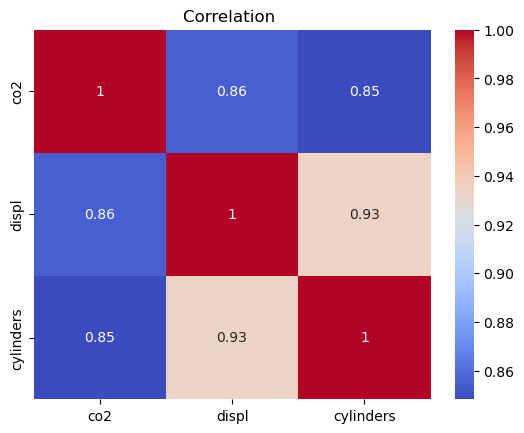

In [26]:
corr_matrix = df[['co2', 'Fuel_usage', 'displ', 'cylinders', 'efficiency']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation ')
plt.show()

#### 10- CO2 by Engine Displacement

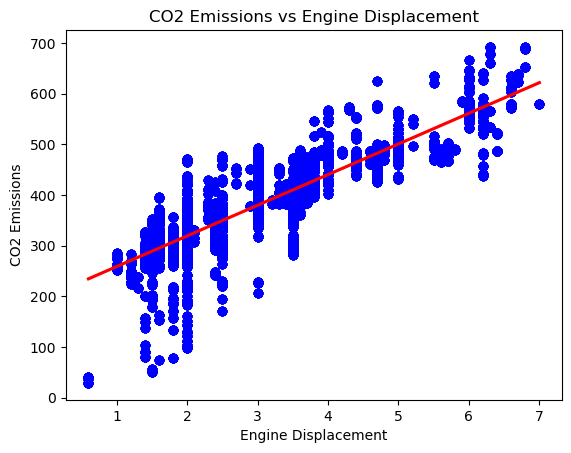

''

In [27]:
sns.regplot(x=df['displ'], y=df['co2'],scatter_kws={"color":"blue"}, line_kws={"color":"red"},)
plt.title('CO2 Emissions vs Engine Displacement', color='black')
plt.xlabel('Engine Displacement')
plt.ylabel('CO2 Emissions')
plt.show()
;

#### 11- Ratio Fuel usage

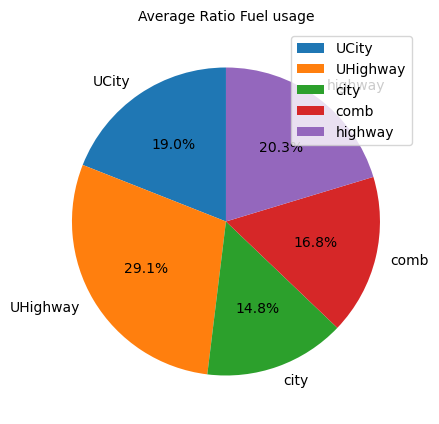

In [28]:
plt.figure(figsize=[5, 5])
df.groupby('Fuel_usage')['value'].mean().plot(
            kind='pie', autopct='%1.1f%%', startangle=90
           )
plt.title('Average Ratio Fuel usage', size=10)
plt.ylabel('')
plt.legend('')
plt.legend()
plt.show()